In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import all the necessary libraries 

### Load the dataset and learn the data 

In [2]:
df = pd.read_csv('Covid data.csv')

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.tail(1)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [5]:
print(f'Shape of the dataset is : {df.shape[0]}, {df.shape[1]}')

Shape of the dataset is : 1048575, 21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

### Most binary categorical fields use the following coding scheme:

#### 1 = Yes / Positive
#### 2 = No / Negative
#### 97, 99 = Missing values
#### 9999-99-99 represents that the person didn't die 

### Since the missing values are represented as 97, 99. Going to convert them to Nan and then clean it 

In [8]:
cols = df.columns

df[cols].isin([96, 97, 99,'9999-99-99']).any().count()

np.int64(21)

In [9]:
mv = df[cols].isin([96, 97, 99, '9999-99-99']).sum()
mp = (mv / len(df))*100

data = pd.DataFrame({'Missing values : ' : mv, 'Missing Percent : ' : mp})
data

,Missing values :,Missing Percent :
USMER,0,0.000000
MEDICAL_UNIT,0,0.000000
SEX,0,0.000000
PATIENT_TYPE,0,0.000000
DATE_DIED,971633,92.662232
INTUBED,855869,81.622106
PNEUMONIA,16003,1.526166
AGE,416,0.039673
PREGNANT,523511,49.925947
DIABETES,0,0.000000


In [10]:
for col in cols:
    print(df[col].value_counts(normalize=True, dropna=False) * 100)

USMER
2    63.219417
1    36.780583
Name: proportion, dtype: float64
MEDICAL_UNIT
12    57.506139
4     29.984026
6      3.870396
9      3.635028
3      1.828672
8      0.991727
10     0.750829
5      0.690842
11     0.531865
13     0.094986
7      0.084972
2      0.016117
1      0.014400
Name: proportion, dtype: float64
SEX
1    50.074053
2    49.925947
Name: proportion, dtype: float64
PATIENT_TYPE
1    80.923539
2    19.076461
Name: proportion, dtype: float64
DATE_DIED
9999-99-99    92.662232
06/07/2020     0.095368
07/07/2020     0.094986
13/07/2020     0.094414
16/06/2020     0.093365
                ...    
25/12/2020     0.000095
01/01/2021     0.000095
02/01/2021     0.000095
07/01/2021     0.000095
22/04/2021     0.000095
Name: proportion, Length: 401, dtype: float64
INTUBED
97    80.923539
2     15.168204
1      3.209689
99     0.698567
Name: proportion, dtype: float64
PNEUMONIA
2     85.118756
1     13.355077
99     1.526166
Name: proportion, dtype: float64
AGE
30     2.57587

In [11]:
df[cols] = df[cols].replace([96, 97, 98, 99], np.nan)

In [12]:
mv = df[cols].isin([96, 97, 98,99]).sum()
mp = (mv / len(df))*100

data = pd.DataFrame({'Missing values : ' : mv, 'Missing Percent : ' : mp})
data

,Missing values :,Missing Percent :
USMER,0,0.0
MEDICAL_UNIT,0,0.0
SEX,0,0.0
PATIENT_TYPE,0,0.0
DATE_DIED,0,0.0
INTUBED,0,0.0
PNEUMONIA,0,0.0
AGE,0,0.0
PREGNANT,0,0.0
DIABETES,0,0.0


In [13]:
print('Missing Percentage of each column : ')
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)

Missing Percentage of each column : 


ICU                     81.637651
INTUBED                 81.622106
PREGNANT                50.283957
PNEUMONIA                1.526166
OTHER_DISEASE            0.481129
INMSUPR                  0.324631
DIABETES                 0.318337
TOBACCO                  0.307083
HIPERTENSION             0.296021
CARDIOVASCULAR           0.293350
OBESITY                  0.289154
RENAL_CHRONIC            0.286675
COPD                     0.286389
ASTHMA                   0.284100
AGE                      0.051498
DATE_DIED                0.000000
MEDICAL_UNIT             0.000000
USMER                    0.000000
PATIENT_TYPE             0.000000
SEX                      0.000000
CLASIFFICATION_FINAL     0.000000
dtype: float64

### Handling the columns as per the missing values

1. **Removing these columns** (missing values > 80%):
   - `ICU`
   - `INTUBED`

2. **Filling `"Unknown"` for columns with ~50% missing values**:
   - `PREGNANT`

3. **Filling numeric columns with mean/median (low missing %)**:
   - `PNEUMONIA`
   - `OTHER_DISEASE`
   - `INMSUPR`
   - `DIABETES`
   - `TOBACCO`
   - `HIPERTENSION`
   - `CARDIOVASCULAR`
   - `OBESITY`
   - `RENAL_CHRONIC`
   - `COPD`
   - `ASTHMA`
   - `AGE`


In [14]:
df.drop(columns=['ICU', 'INTUBED'], inplace=True)

In [15]:
df['PREGNANT'].value_counts(normalize = True)

PREGNANT
2.0    0.984403
1.0    0.015597
Name: proportion, dtype: float64

In [16]:
df['PREGNANT'] = df['PREGNANT'].fillna('Unknown')

In [17]:
df['PREGNANT'] = df['PREGNANT'].apply(lambda x: 'Yes' if x == 1.0 else 'Unknown' if x == 2.0 else 'No')

In [18]:
df['PREGNANT'] = df['PREGNANT'].astype('category')

In [19]:
df['PREGNANT'].value_counts(normalize = True)

PREGNANT
No         0.502840
Unknown    0.489406
Yes        0.007754
Name: proportion, dtype: float64

In [20]:
cols = ['PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO']

for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().any().sum()

np.int64(0)

In [21]:
df['DEATH_STATUS'] = df['DATE_DIED'].apply(lambda x: 'ALIVE' if x == '9999-99-99' else 'DEAD')

In [22]:
df.drop(columns = ['DATE_DIED'], inplace = True)

### Converting some numerical columns to categorical columns 

In [23]:
cols = df[['USMER', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO']]
for col in cols:
    print(col, df[col].unique())

USMER [2 1]
PNEUMONIA [1. 2.]
DIABETES [2. 1.]
COPD [2. 1.]
ASTHMA [2. 1.]
INMSUPR [2. 1.]
HIPERTENSION [1. 2.]
OTHER_DISEASE [2. 1.]
CARDIOVASCULAR [2. 1.]
OBESITY [2. 1.]
RENAL_CHRONIC [2. 1.]
TOBACCO [2. 1.]


## Column Mappings
### 1. USMER
-  `USMER`
-  **1** - Level 1
-  **2** - Level 2
### 2. Yes / No Columns
- `PNEUMONIA`, `DIABETES`, `COPD`, `ASTHMA`, `INMSUPR`, `HIPERTENSION`,
  `OTHER_DISEASE`, `CARDIOVASCULAR`, `OBESITY`, `RENAL_CHRONIC`, `TOBACCO`  
- **1** - Yes  
- **2** - No   

### 3. `SEX`
- **1** - Female  
- **2** - Male  

### 4. `PATIENT_TYPE`
- **1** - Outpatient  
- **2** - Hospitalized  

### 5. `CLASSIFICATION_FINAL` (COVID-19 Classification)
- **1** - Laboratory Test  
- **2** - Epidemiologic Link  
- **3** - Expert Judgement  
- **4** - Suspected Case  
- **5** - Not COVID-19  
- **6** - Pending Result  
- **7** - Invalid  


In [24]:
cols = df[['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO']]
for col in cols:
    df[col] = df[col].apply(lambda x : 'Yes' if x == 1 else 'No')

In [25]:
df['SEX'] = df['SEX'].apply(lambda x : 'Female' if x == 1 else 'Male')
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].apply(lambda x : 'Outpatient' if x == 1 else 'Hospitalized')
df['USMER'] = df['USMER'].apply(lambda x : 'Level-1' if x == 1 else 'Level-2')

In [26]:
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].map({
    1: "Laboratory Test", 2: "Epidemiologic Link", 3: "Expert Judgement", 4: "Suspected Case", 5: "Not COVID-19", 6: "Pending Result", 7: "Invalid"
})

In [27]:
df['AGE'] = df['AGE'].astype(int)

### It looks like there are some age data > 100

In [28]:
df['AGE'].sort_values(ascending=False).unique()

array([121, 120, 119, 118, 117, 116, 115, 114, 113, 111, 110, 109, 108,
       107, 106, 105, 104, 103, 102, 101, 100,  95,  94,  93,  92,  91,
        90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,
        77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,
        64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,
        51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,
        38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1,   0])

In [29]:
print('And the total number of data where the Age >= 100 is : ', df[df['AGE'] > 100].shape[0])

And the total number of data where the Age >= 100 is :  138


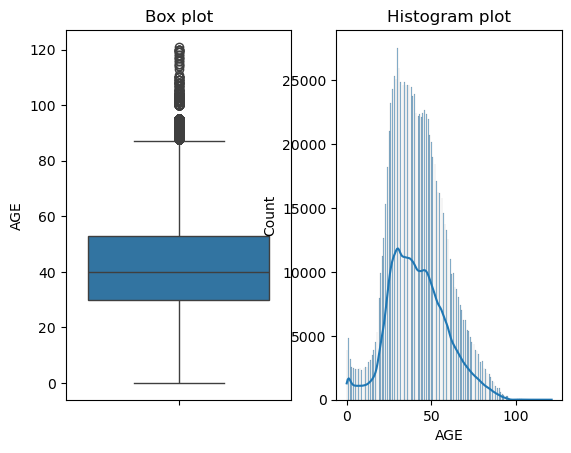

In [30]:
plt.subplot(1, 2, 1)
sns.boxplot(df['AGE'])
plt.title('Box plot')

plt.subplot(1, 2, 2)
sns.histplot(df['AGE'], kde = True)
plt.title('Histogram plot')
plt.show()

In [276]:
df['AGE'].shape

(1048575,)

### Since some age values are >100, going to remove them 

In [277]:
df = df[df['AGE'] <= 100].copy()

In [28]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH_STATUS
0,Level-2,1,Female,Outpatient,Yes,65,Unknown,No,No,No,No,Yes,No,No,No,No,No,Expert Judgement,DEAD
1,Level-2,1,Male,Outpatient,Yes,72,No,No,No,No,No,Yes,No,No,Yes,Yes,No,Not COVID-19,DEAD
2,Level-2,1,Male,Hospitalized,No,55,No,Yes,No,No,No,No,No,No,No,No,No,Expert Judgement,DEAD
3,Level-2,1,Female,Outpatient,No,53,Unknown,No,No,No,No,No,No,No,No,No,No,Invalid,DEAD
4,Level-2,1,Male,Outpatient,No,68,No,Yes,No,No,No,Yes,No,No,No,No,No,Expert Judgement,DEAD


In [33]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'DEATH_STATUS'],
      dtype='object')

In [34]:
cols = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'DEATH_STATUS']

df_filtered = df[cols].sample(n=1000000, random_state=42)  


In [35]:
df_filtered.isnull().any()

USMER                   False
MEDICAL_UNIT            False
SEX                     False
PATIENT_TYPE            False
PNEUMONIA               False
AGE                     False
PREGNANT                False
DIABETES                False
COPD                    False
ASTHMA                  False
INMSUPR                 False
HIPERTENSION            False
OTHER_DISEASE           False
CARDIOVASCULAR          False
OBESITY                 False
RENAL_CHRONIC           False
TOBACCO                 False
CLASIFFICATION_FINAL    False
DEATH_STATUS            False
dtype: bool

In [36]:
df_filtered.to_csv("Covid19CleanedData.csv", index=False)